In [1]:
!pip install git+https://github.com/IBM/tsfm.git
!pip install transformers pandas scikit-learn matplotlib


  Cloning https://github.com/IBM/tsfm.git to /tmp/pip-req-build-hf3x81oq
  Running command git clone --filter=blob:none --quiet https://github.com/IBM/tsfm.git /tmp/pip-req-build-hf3x81oq
  Resolved https://github.com/IBM/tsfm.git to commit 02dc9dc7e672abfc3ec6d421deedaff696de81ad
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)

In [2]:
!pip install transformers
!pip install transformers[torch]

In [6]:
# Debugging: print the contents of the tuple and shape
print("Contents of predicted_values tuple:", predicted_values)
print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
print("Shape of predictions after reshaping:", predictions.shape)

# Align the predictions with the test dates
test_dates = data['Date'].iloc[-len(predictions):]

# Debugging: print lengths to ensure alignment
print("Length of test_dates:", len(test_dates))
print("Length of predictions:", len(predictions))

Contents of predicted_values tuple: (array([[[1.5925469],
        [1.6162796],
        [1.617311 ],
        ...,
        [1.6862292],
        [1.8863493],
        [1.8764523]],

       [[1.5789945],
        [1.5923752],
        [1.616726 ],
        ...,
        [1.6931394],
        [1.8972915],
        [1.8568082]],

       [[1.5640965],
        [1.5907346],
        [1.6058233],
        ...,
        [1.6715639],
        [1.9097576],
        [1.8427246]],

       ...,

       [[1.6574843],
        [1.6811101],
        [1.7076735],
        ...,
        [2.014787 ],
        [2.0544496],
        [1.9455259]],

       [[1.6521336],
        [1.6564245],
        [1.6940395],
        ...,
        [1.9857883],
        [2.0330684],
        [1.909508 ]],

       [[1.637872 ],
        [1.6156374],
        [1.6711276],
        ...,
        [1.9572451],
        [1.9688578],
        [1.8528256]]], dtype=float32), array([[[1.0441972]],

       [[1.0445012]],

       [[1.0447211]],

       [[1.0449375]

In [9]:
# Kiểm tra một vài hàng của tập dữ liệu
print(data.head())

# Kiểm tra kích thước của tập dữ liệu huấn luyện và kiểm tra
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Kiểm tra dữ liệu đầu vào và đầu ra của mô hình
print("Train Data:")
print(train_data.head())

print("Test Data:")
print(test_data.head())

print(config)

# Kiểm tra các giá trị mất mát (loss)
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

        Date  Value (USD per troy ounce)
0 2018-01-01                 1307.018690
1 2018-01-02                 1319.827953
2 2018-01-03                 1311.501862
3 2018-01-04                 1321.635371
4 2018-01-05                 1319.589185
Train shape: (1577, 2)
Test shape: (675, 2)
Train Data:
        Date  Value (USD per troy ounce)
0 2018-01-01                 1307.018690
1 2018-01-02                 1319.827953
2 2018-01-03                 1311.501862
3 2018-01-04                 1321.635371
4 2018-01-05                 1319.589185
Test Data:
           Date  Value (USD per troy ounce)
1577 2022-04-27                 1884.729918
1578 2022-04-28                 1894.049880
1579 2022-04-29                 1896.960159
1580 2022-04-30                 1896.960159
1581 2022-05-01                 1898.690075
PatchTSTConfig {
  "activation_function": "gelu",
  "architectures": [
    "PatchTSTForPrediction"
  ],
  "attention_dropout": 0.0,
  "bias": true,
  "channel_attention": false,

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Evaluation metrics: {'eval_loss': 0.04319990426301956, 'eval_runtime': 0.4687, 'eval_samples_per_second': 145.072, 'eval_steps_per_second': 4.267, 'epoch': 19.0}


In [ ]:
import os
# Save the model
save_dir = "patchtst/gold_price/model/pretrain/"
os.makedirs(save_dir, exist_ok=True)
trainer.save_model(save_dir)

GOLD PRICE 7-3

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.4050114154815674, 'eval_runtime': 0.0982, 'eval_samples_per_second': 692.217, 'eval_steps_per_second': 20.359}


Epoch,Training Loss,Validation Loss
1,0.590000,0.252849
2,0.342700,0.109548
3,0.229900,0.065679
4,0.191000,0.083732
5,0.154900,0.144113
6,0.133800,0.149027
7,0.108900,0.071220
8,0.084700,0.059844
9,0.080700,0.050918
10,0.066400,0.064437


Test results: {'eval_loss': 0.050918255001306534, 'eval_runtime': 0.099, 'eval_samples_per_second': 686.702, 'eval_steps_per_second': 20.197, 'epoch': 19.0}
Actual Values:
[2026.828726 2027.695482 2027.382641 2035.785444 2035.797877 2031.609404
 2033.313814 2032.65377  2036.199141 2044.59131 ]
Predicted Values:
[1981.1934 1999.5176 1999.5396 2009.98   1996.1837 1991.6545 2042.1058
 1983.9508 1959.2898 1974.3116]


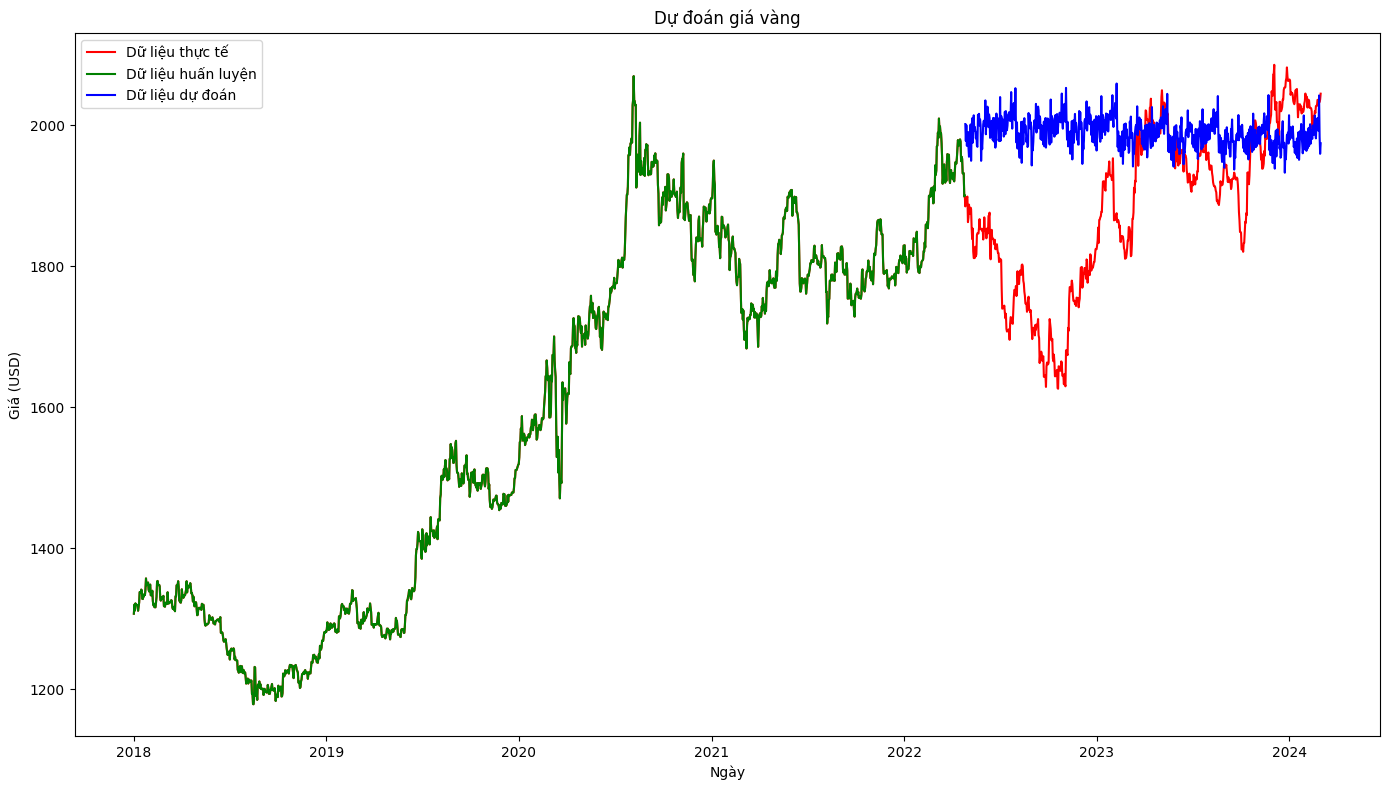

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from transformers import PatchTSTConfig, PatchTSTForPrediction, Trainer, TrainingArguments, EarlyStoppingCallback, DefaultDataCollator
from tsfm_public.toolkit.dataset import ForecastDFDataset
from tsfm_public.toolkit.time_series_preprocessor import TimeSeriesPreprocessor
from tsfm_public.toolkit.util import select_by_index

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/gold_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.3)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá vàng')


SILVER PRICE 7-3

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.11141590774059296, 'eval_runtime': 0.0952, 'eval_samples_per_second': 713.917, 'eval_steps_per_second': 20.998}


Epoch,Training Loss,Validation Loss
1,0.815500,0.056440
2,0.567500,0.039593
3,0.436600,0.043892
4,0.375400,0.043319
5,0.316200,0.045684
6,0.274700,0.046989
7,0.253000,0.055263
8,0.223100,0.055010
9,0.204100,0.074791
10,0.167400,0.097567


Test results: {'eval_loss': 0.03959278017282486, 'eval_runtime': 0.1768, 'eval_samples_per_second': 384.59, 'eval_steps_per_second': 11.311, 'epoch': 12.0}
Actual Values:
[23.05342132 22.88090977 22.8300062  22.94640995 22.94715097 22.80071825
 22.55805354 22.48693816 22.5078085  22.67652863]
Predicted Values:
[23.541782 23.53389  23.6748   23.711004 23.559748 23.34337  23.681095
 23.3941   23.082655 23.911835]


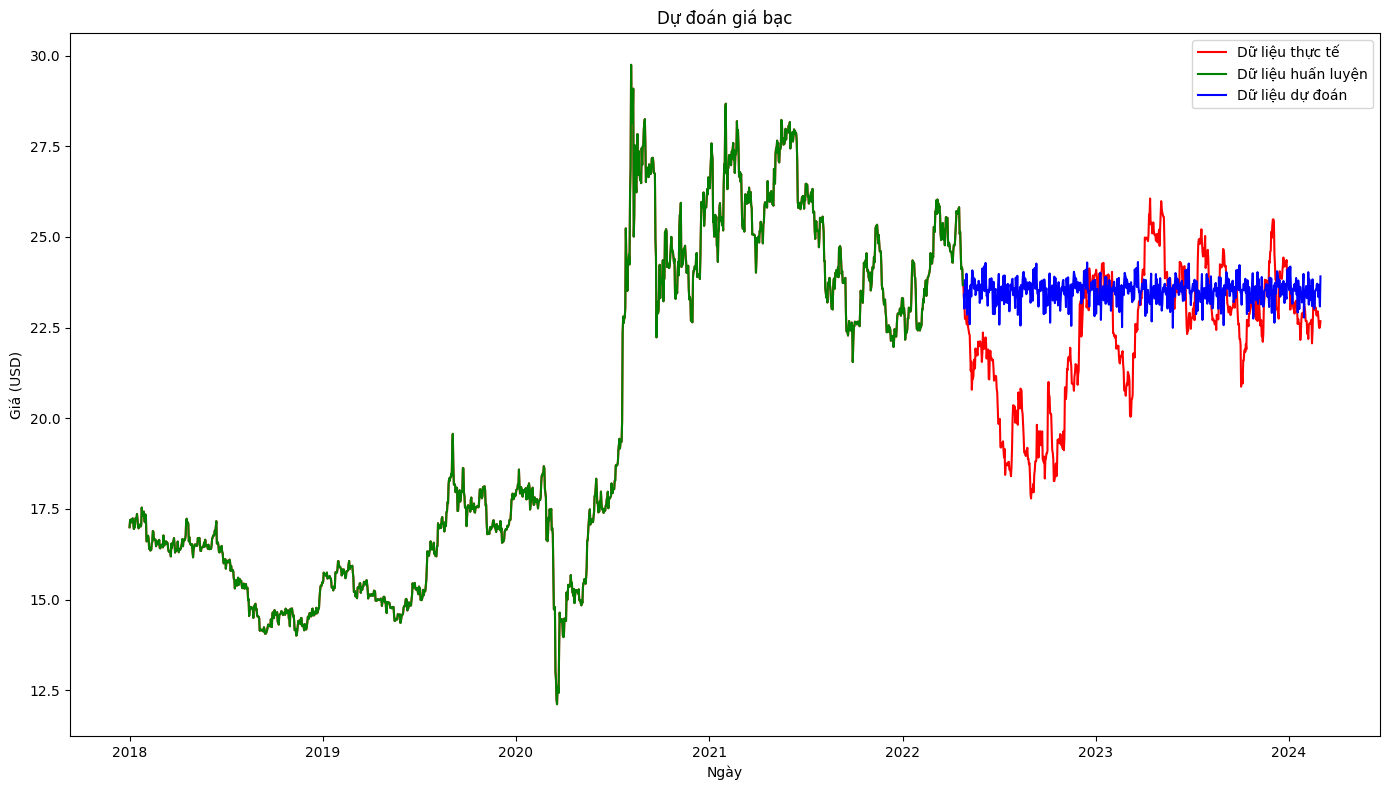

In [27]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/silver_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.3)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạc')


PLATINUM PRICE 7-3

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.1752433031797409, 'eval_runtime': 0.1029, 'eval_samples_per_second': 661.125, 'eval_steps_per_second': 19.445}


Epoch,Training Loss,Validation Loss
1,1.131300,0.234664
2,0.851800,0.252469
3,0.614700,0.163123
4,0.447600,0.153593
5,0.361100,0.135108
6,0.329700,0.129424
7,0.298300,0.127930
8,0.276600,0.124575
9,0.264600,0.123724
10,0.254100,0.128521


Test results: {'eval_loss': 0.12372437864542007, 'eval_runtime': 0.1371, 'eval_samples_per_second': 495.896, 'eval_steps_per_second': 14.585, 'epoch': 19.0}
Actual Values:
[908.4157085 887.634602  904.7748861 902.7672706 902.5715527 899.35749
 884.7729252 893.1840323 884.4419149 882.441964 ]
Predicted Values:
[951.8122  934.99646 947.2379  941.07526 946.4025  941.2935  934.91
 939.2576  946.0045  958.1626 ]


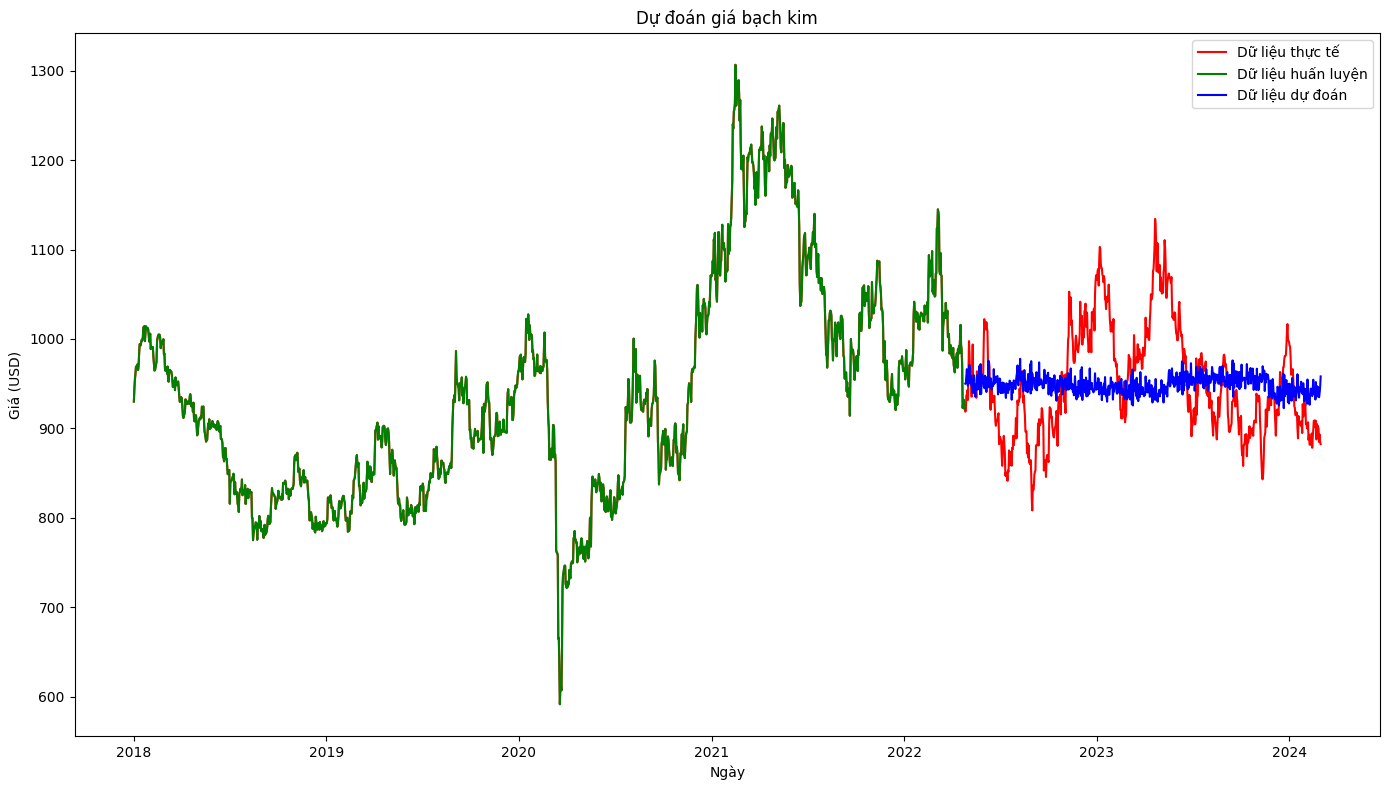

In [28]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/platium_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.3)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạch kim')


GOLD PRICE 8-2

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.7045395374298096, 'eval_runtime': 0.0314, 'eval_samples_per_second': 31.882, 'eval_steps_per_second': 31.882}


Epoch,Training Loss,Validation Loss
1,0.532700,0.345048
2,0.304700,0.078853
3,0.230500,0.089420
4,0.180400,0.158940
5,0.151600,0.146971
6,0.114400,0.017518
7,0.084300,0.031803
8,0.076500,0.024122
9,0.068400,0.040183
10,0.058000,0.067031


Test results: {'eval_loss': 0.017517954111099243, 'eval_runtime': 0.0166, 'eval_samples_per_second': 60.199, 'eval_steps_per_second': 60.199, 'epoch': 16.0}
Actual Values:
[2026.828726 2027.695482 2027.382641 2035.785444 2035.797877 2031.609404
 2033.313814 2032.65377  2036.199141 2044.59131 ]
Predicted Values:
[2066.396  2068.8958 2036.9246 2049.8054 2063.7393 2039.9963 2065.2173
 2060.9194 2056.7153 2078.3674]


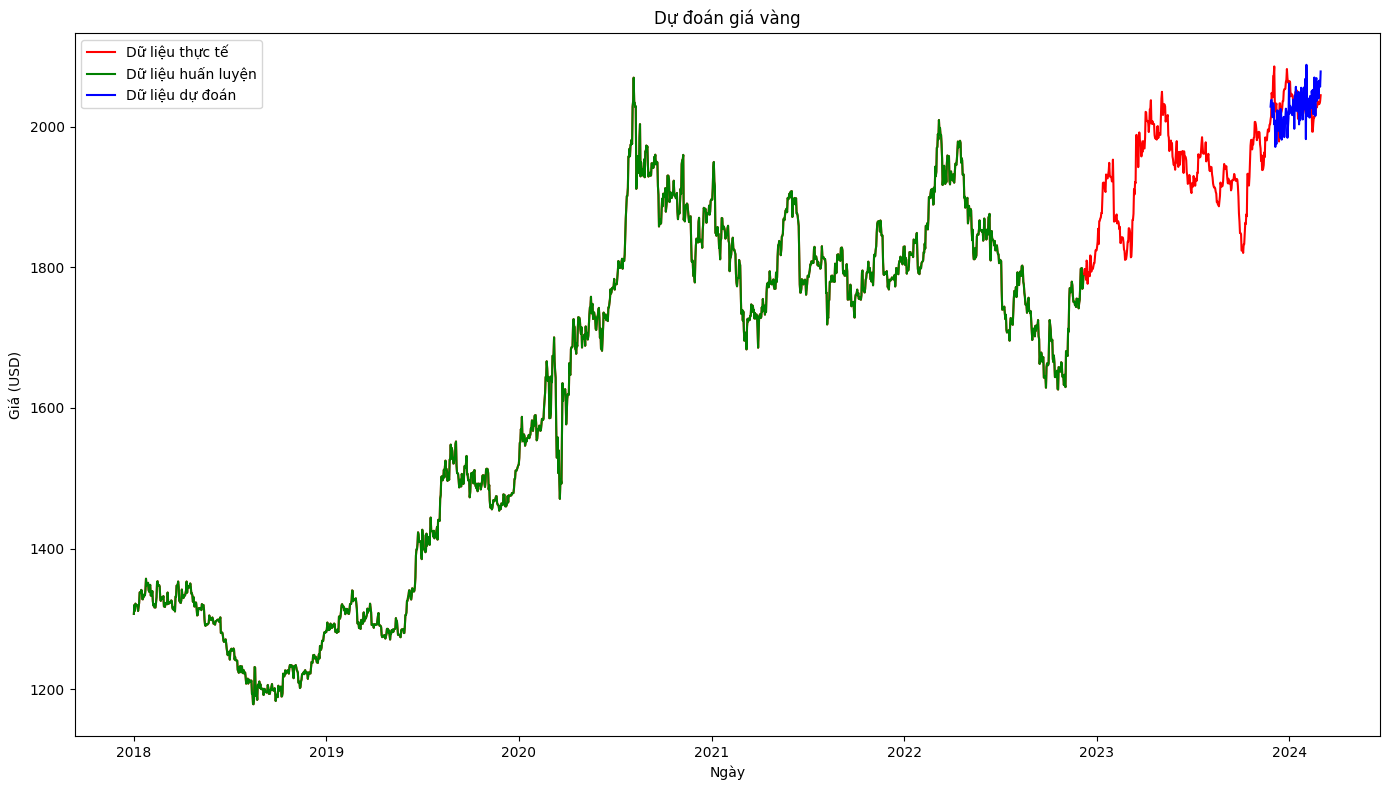

In [29]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/gold_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.2)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá vàng')


SILVER PRICE 8-2

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.09820417314767838, 'eval_runtime': 0.015, 'eval_samples_per_second': 66.788, 'eval_steps_per_second': 66.788}


Epoch,Training Loss,Validation Loss
1,0.890300,0.048067
2,0.657500,0.041365
3,0.487300,0.042020
4,0.368700,0.041321
5,0.323600,0.058644
6,0.289700,0.067726
7,0.259300,0.124941
8,0.213800,0.177199
9,0.182700,0.258772
10,0.151300,0.454467


Test results: {'eval_loss': 0.0413208045065403, 'eval_runtime': 0.0109, 'eval_samples_per_second': 91.537, 'eval_steps_per_second': 91.537, 'epoch': 12.0}
Actual Values:
[23.05342132 22.88090977 22.8300062  22.94640995 22.94715097 22.80071825
 22.55805354 22.48693816 22.5078085  22.67652863]
Predicted Values:
[22.882675 23.575562 23.341047 23.17444  23.54069  23.652557 22.941412
 23.29922  23.428965 23.46296 ]


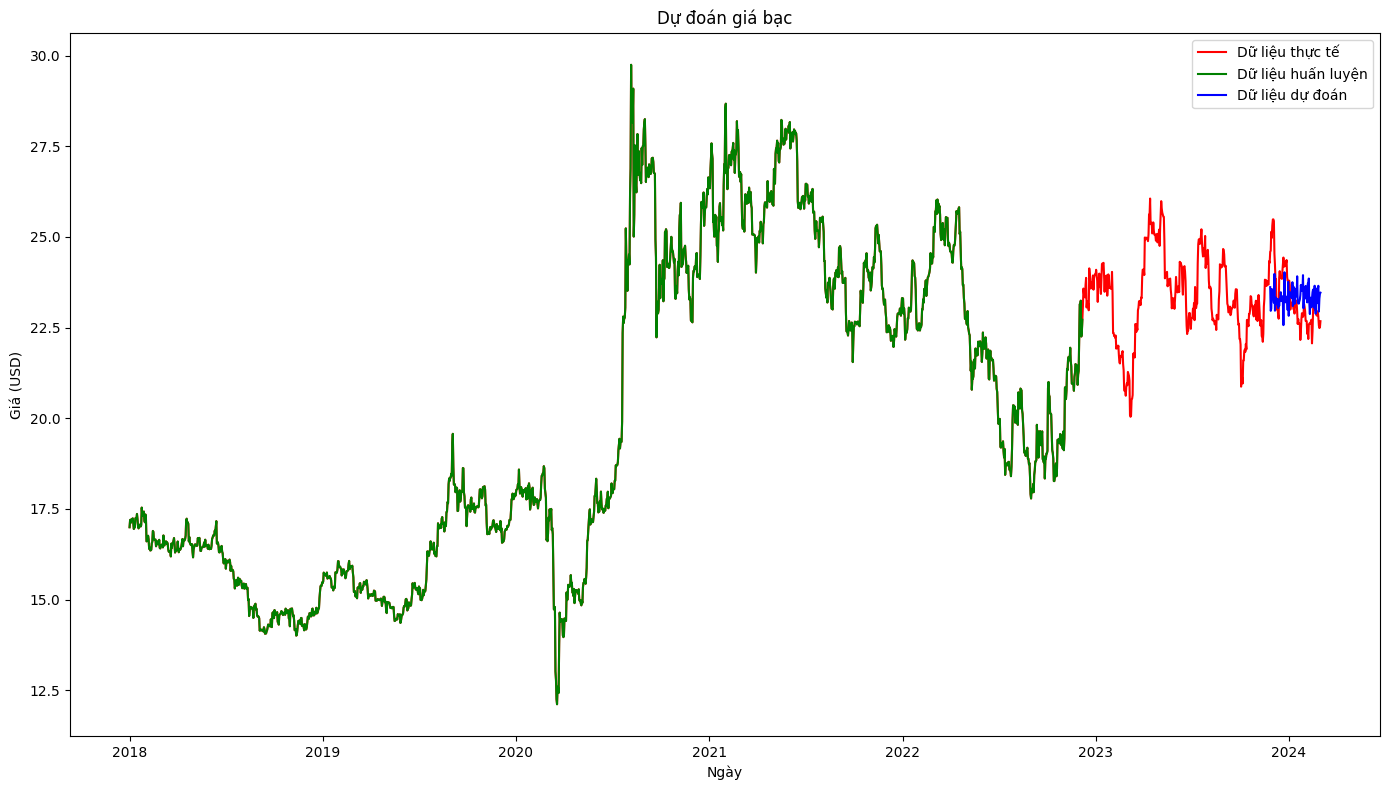

In [30]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/silver_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.2)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạc')


PLATINUM PRICE 8-2

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.18838971853256226, 'eval_runtime': 0.0113, 'eval_samples_per_second': 88.188, 'eval_steps_per_second': 88.188}


Epoch,Training Loss,Validation Loss
1,1.313400,0.211647
2,1.079100,0.158144
3,0.858100,0.124174
4,0.613700,0.123067
5,0.422000,0.111021
6,0.342000,0.132417
7,0.305500,0.128208
8,0.279500,0.124344
9,0.262900,0.118804
10,0.248700,0.147703


Test results: {'eval_loss': 0.1110207736492157, 'eval_runtime': 0.0114, 'eval_samples_per_second': 87.901, 'eval_steps_per_second': 87.901, 'epoch': 15.0}
Actual Values:
[908.4157085 887.634602  904.7748861 902.7672706 902.5715527 899.35749
 884.7729252 893.1840323 884.4419149 882.441964 ]
Predicted Values:
[950.13214 935.3345  931.489   951.5699  942.2434  948.7802  928.8553
 948.5445  936.8741  936.83075]


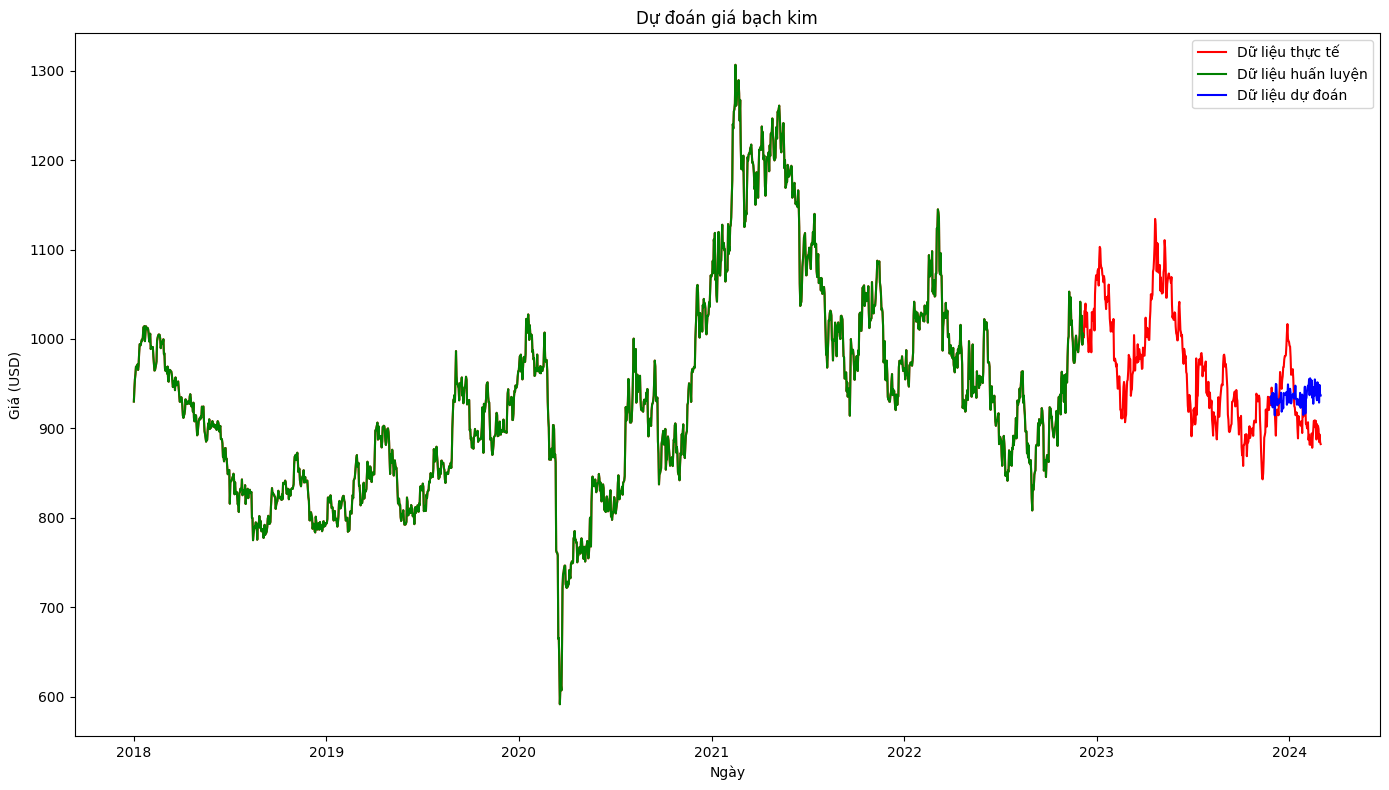

In [31]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/platium_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.2)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạch kim')


GOLD PRICE 9-1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 1.5704163312911987, 'eval_runtime': 0.0111, 'eval_samples_per_second': 89.691, 'eval_steps_per_second': 89.691}


Epoch,Training Loss,Validation Loss
1,0.431000,0.949212
2,0.248300,0.428181
3,0.193600,0.120621
4,0.159200,0.094472
5,0.125300,0.115750
6,0.093700,0.130029
7,0.075300,0.060067
8,0.065200,0.042561
9,0.062600,0.020993
10,0.058100,0.032753


Test results: {'eval_loss': 0.008021659217774868, 'eval_runtime': 0.0114, 'eval_samples_per_second': 87.622, 'eval_steps_per_second': 87.622, 'epoch': 23.0}
Actual Values:
[2026.828726 2027.695482 2027.382641 2035.785444 2035.797877 2031.609404
 2033.313814 2032.65377  2036.199141 2044.59131 ]
Predicted Values:
[2044.556  2025.5116 2020.7198 2045.9917 2043.1266 2054.7026 2053.7627
 2031.9126 2044.9302 2022.8047]


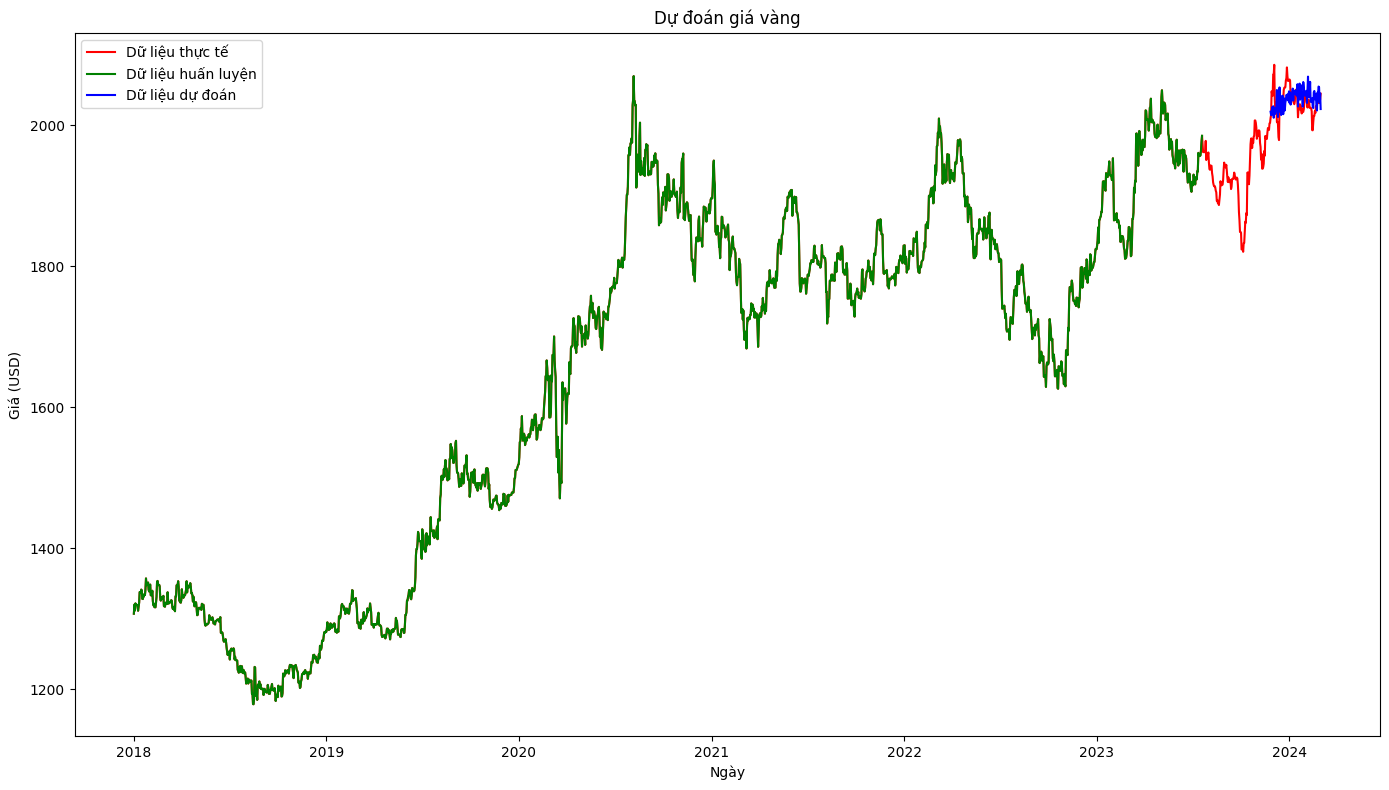

In [32]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/gold_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.9)
test_size = int(len(data) * 0.1)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá vàng')


SILVER PRICE 9-1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.3467136323451996, 'eval_runtime': 0.0115, 'eval_samples_per_second': 87.04, 'eval_steps_per_second': 87.04}


Epoch,Training Loss,Validation Loss
1,0.819100,0.206997
2,0.565000,0.094957
3,0.418600,0.044791
4,0.366700,0.034685
5,0.303800,0.038103
6,0.269500,0.051367
7,0.216400,0.042521
8,0.186500,0.044676
9,0.163100,0.047466
10,0.152900,0.052806


Test results: {'eval_loss': 0.03468454256653786, 'eval_runtime': 0.0138, 'eval_samples_per_second': 72.369, 'eval_steps_per_second': 72.369, 'epoch': 14.0}
Actual Values:
[23.05342132 22.88090977 22.8300062  22.94640995 22.94715097 22.80071825
 22.55805354 22.48693816 22.5078085  22.67652863]
Predicted Values:
[23.498909 23.176218 23.390112 23.369486 23.399435 23.616505 23.133945
 23.20912  23.388027 23.478764]


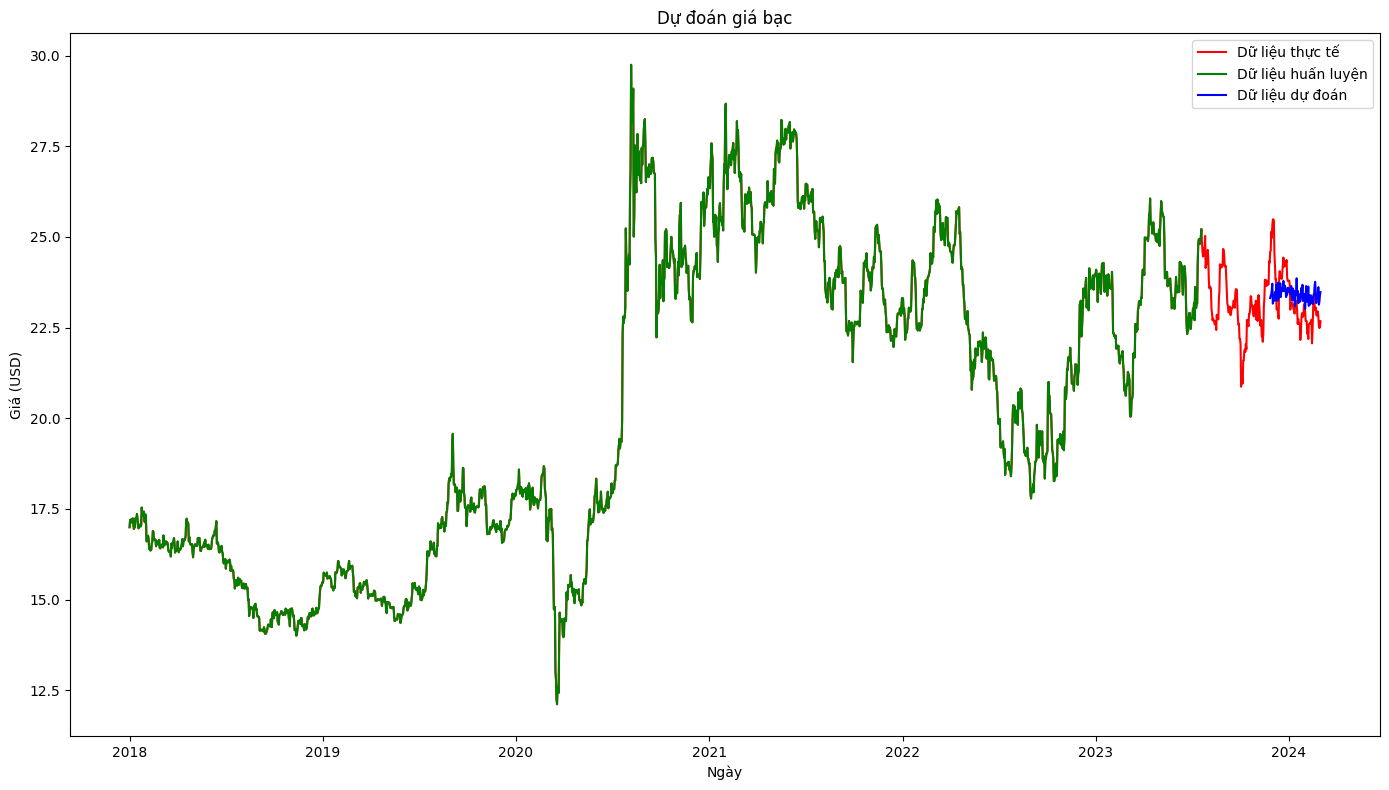

In [33]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/silver_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.9)
test_size = int(len(data) * 0.1)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạc')


PLATINUM PRICE 9-1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.10537637025117874, 'eval_runtime': 0.0114, 'eval_samples_per_second': 87.535, 'eval_steps_per_second': 87.535}


Epoch,Training Loss,Validation Loss
1,1.194800,0.105176
2,0.946600,0.100607
3,0.736400,0.102821
4,0.518400,0.113489
5,0.379200,0.131055
6,0.321400,0.131076
7,0.293100,0.138403
8,0.271300,0.142815
9,0.249300,0.121335
10,0.242200,0.116734


Test results: {'eval_loss': 0.1006070002913475, 'eval_runtime': 0.0108, 'eval_samples_per_second': 92.984, 'eval_steps_per_second': 92.984, 'epoch': 12.0}
Actual Values:
[908.4157085 887.634602  904.7748861 902.7672706 902.5715527 899.35749
 884.7729252 893.1840323 884.4419149 882.441964 ]
Predicted Values:
[933.63586 934.0775  926.72546 931.6782  934.43866 926.99524 934.6742
 940.56824 929.13885 932.70264]


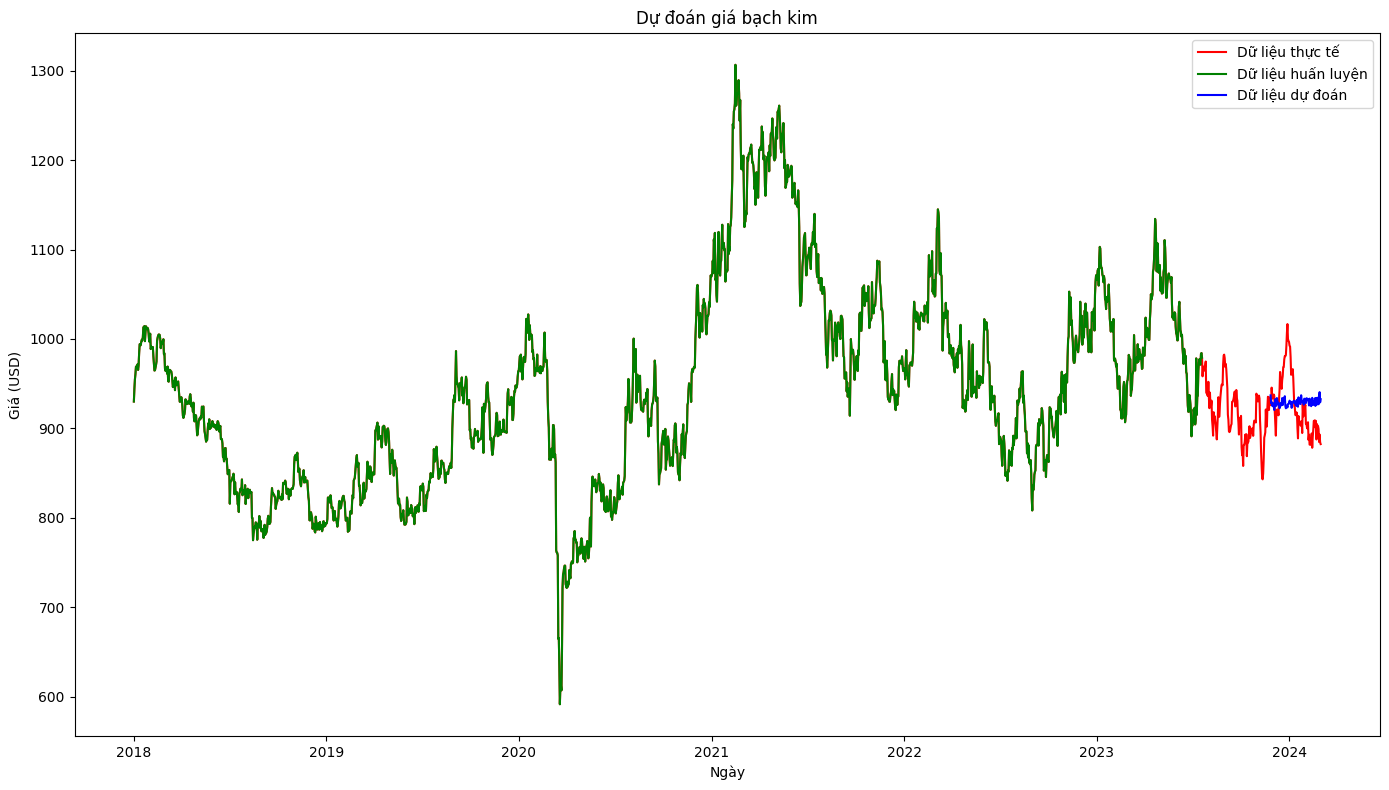

In [34]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/platium_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 9-1
train_size = int(len(data) * 0.9)
test_size = int(len(data) * 0.1)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạch kim')
